In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Akshat\Downloads\cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

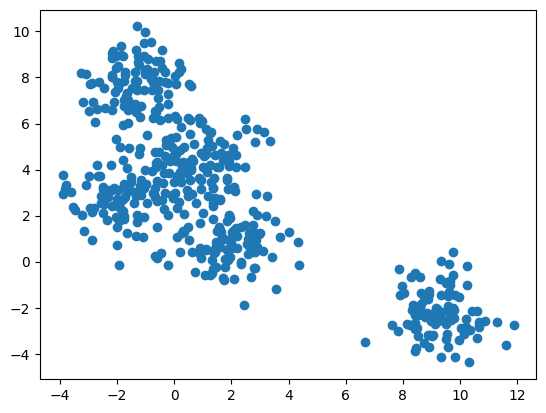

In [4]:
plt.scatter(X, Y)

In [5]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [6]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    d=np.sqrt((P1.x-P2.x)**2+(P1.y-P2.y)**2)
    return d

def Mean(AP):
    ### Write code to find centroid of an group of points
    if len(AP) == 0:
        return Point(0, 0)
    x=np.mean([p.x for p in AP])
    y=np.mean([p.y for p in AP])
    return Point(x,y)

In [7]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    i=np.argmin([Distance(centroid, P) for centroid in AP])
    return AP[i]

In [8]:
def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    a=(A1==A2)
    flag=1
    for e in a:
        if(e==False):
            flag-=1
            break
    return flag

In [156]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    n=len(X)
    p=[]
    for i in range(n):
        p.append(Point(X[i],Y[i]))

    kMi=random.sample(p,k)
    kM=np.array(kMi)

    for _ in range(10):
        centroids=[]
        points=[]

        for i in range(n):
            centroids.append(MinPoint(p[i],kM))

        for i in range(k):
            #We have the ith centroid, kM[i], and we need to find the list of points belonging to the group having kM[i] as centroid
            list=[]
            c=kM[i]
            for j in range(n):
                if(centroids[j].x==c.x and centroids[j].y==c.y):
                    list.append(p[j])
            points.append(list)

        for i in range(k):
            #Now we update the centroid to the mean of the group
            kM[i]=Mean(points[i])

    list=[]
    for i in range(k):
        c=kM[i]
        pts=[]
        for j in range(n):
            if(centroids[j].x==c.x and centroids[j].y==c.y):
                pts.append(p[j])

        list.append((c,pts))

    D=dict(list)
    return [kM, kMi, D]

In [157]:
[km, kmi, d]=kMeans(X,Y,3)

In [166]:
def Elbow(X, Y):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    sums=[]
    K=range(1,10)

    for k in K:
        sum=0
        km, kmi, d=kMeans(X,Y,k)
        for centroid in d:
            points=d[centroid]
            for point in points:
                sum+=Distance(centroid,point)**2
        sums.append(sum/k)
    
    return sums

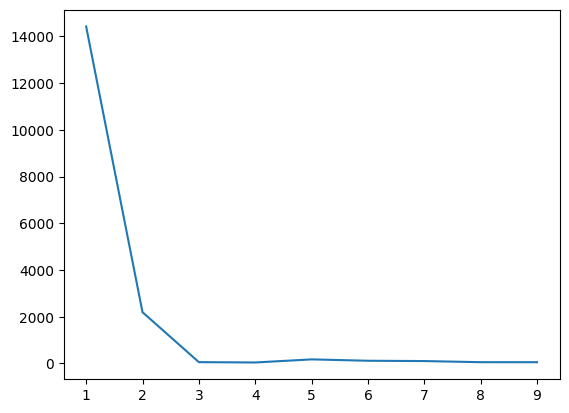

In [167]:
### Here, plot the elbow curve
a=Elbow(X,Y)
plt.plot(range(1,10),a)

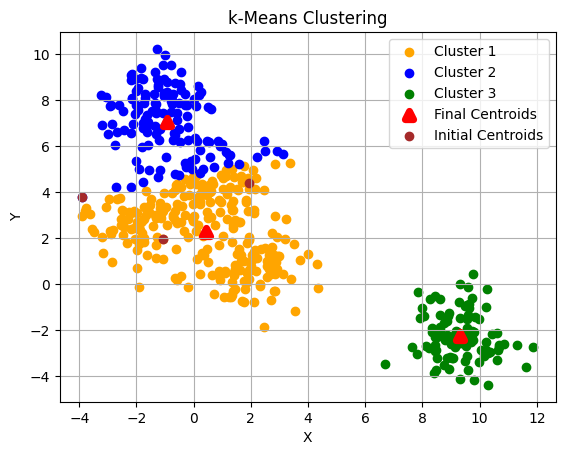

In [177]:
### Here, plot the scatter plot with each point colour coded with the respective groups. And, with initial k centroids, and final k centroids
centroids_x = [centroid.x for centroid in km]
centroids_y = [centroid.y for centroid in km]

centroids_xi = [centroid.x for centroid in kmi]
centroids_yi = [centroid.y for centroid in kmi]

# Plot each cluster
colors = ['orange', 'blue', 'green']  # Define colors for each cluster
for i in range(len(km)):
    cluster_points = d[km[i]]
    px = [point.x for point in cluster_points]
    py = [point.y for point in cluster_points]
    plt.scatter(px, py, c=colors[i], label=f'Cluster {i+1}')  # Scatter plot for each cluster

# Plot centroids
plt.scatter(centroids_x, centroids_y, color='red', marker='^', label='Final Centroids', linewidths=5)
plt.scatter(centroids_xi, centroids_yi, color='brown', marker='o', label='Initial Centroids')

# Plot settings
plt.title('k-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()